Custom Loss: 305978.7991646388
Mean Squared Error: 33685.107688776276
R-squared: 0.5776929106617281


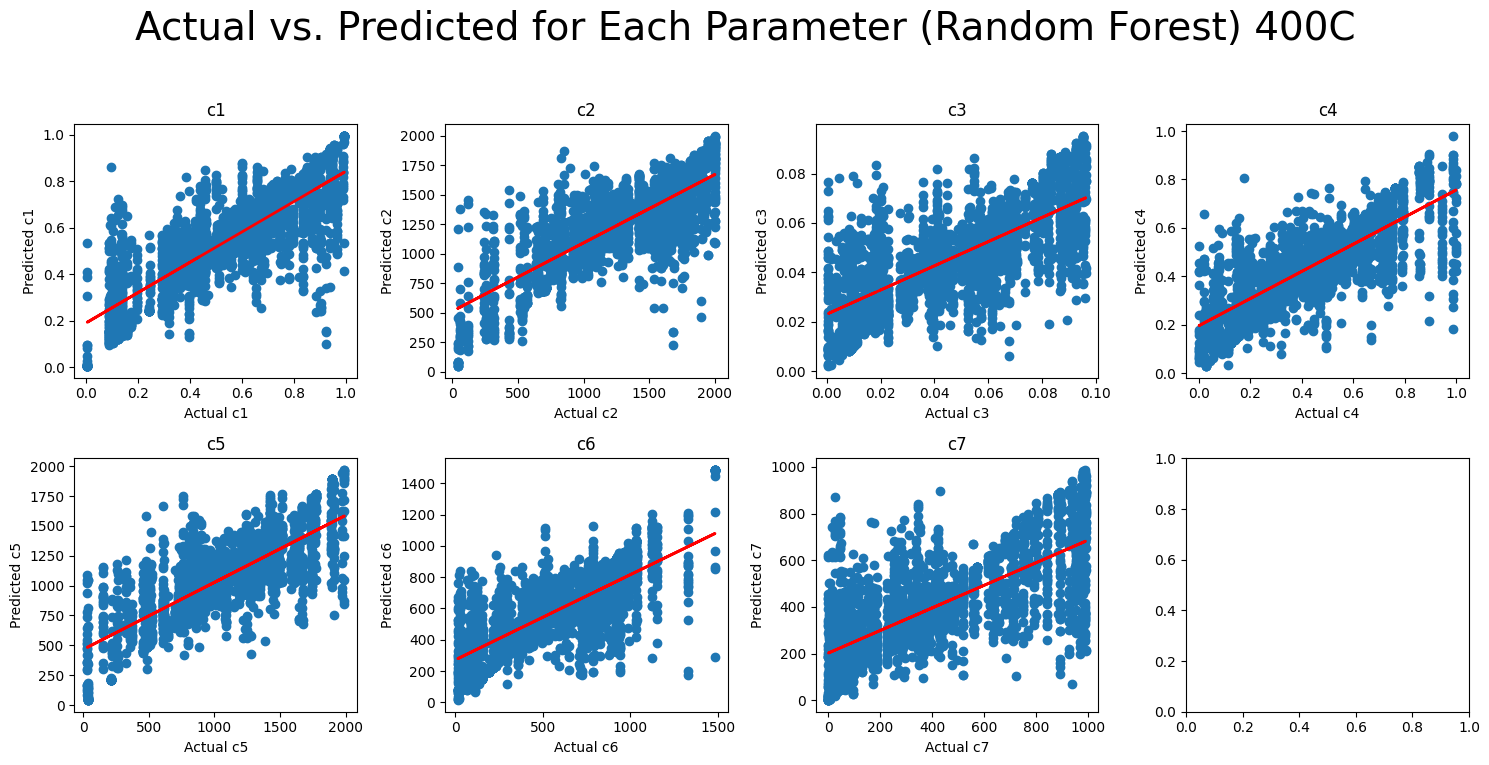

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X_file_path = 'MODEL_DATA/400C/400c_combined_updated.csv'
y_file_path = 'MODEL_DATA/400C/400c_expanded_hardParam.csv'

X = pd.read_csv(X_file_path)
y = pd.read_csv(y_file_path)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def custom_loss(y_true, y_pred):
    weights = np.array([1.0, 10, 1.0, 1.0, 10, 10, 5])
    squared_diff = (y_true - y_pred) ** 2
    weighted_squared_diff = squared_diff * weights
    return np.mean(weighted_squared_diff)

rf_model_custom_loss = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_custom_loss.fit(X_train, y_train)

y_pred_custom_loss = rf_model_custom_loss.predict(X_test)

custom_loss_value = custom_loss(y_test.values, y_pred_custom_loss)
print(f'Custom Loss: {custom_loss_value}')

mse = mean_squared_error(y_test, y_pred_custom_loss)
r2 = r2_score(y_test, y_pred_custom_loss)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
fig.suptitle('Actual vs. Predicted for Each Parameter (Random Forest) 400C', fontsize=28)

for i, ax in enumerate(axes.flatten()):
    if i < y.shape[1]:  
        ax.scatter(y_test.iloc[:, i], y_pred_custom_loss[:, i])
        ax.set(xlabel=f'Actual c{i+1}', ylabel=f'Predicted c{i+1}')
        ax.set_title(f'c{i+1}')

        lr = LinearRegression()
        lr.fit(y_test.iloc[:, i].values.reshape(-1, 1), y_pred_custom_loss[:, i])
        line = lr.predict(y_test.iloc[:, i].values.reshape(-1, 1))

        ax.plot(y_test.iloc[:, i], line, color='red', linewidth=2)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [3]:
X_example = X_test.iloc[0, :]  
X_example = X_example.values.reshape(1, -1)  
prediction = rf_model_custom_loss.predict(X_example)

predicted_parameters = prediction[0].tolist()

for i, parameter in enumerate(predicted_parameters, start=1):
    print(f'Predicted c{i}: {parameter}')

Predicted c1: 0.46484015585962063
Predicted c2: 1532.01584235373
Predicted c3: 0.025253304551182923
Predicted c4: 0.5933198063083139
Predicted c5: 849.9930171030272
Predicted c6: 802.4340410589097
Predicted c7: 452.703450494406


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [4]:
conditions = [0.5, 1300, 2.3e-14, 0.075, 773.18, 1039.37, 73.94]

for i, condition in enumerate(conditions):
    lr = LinearRegression()
    lr.fit(y_test.iloc[:, i].values.reshape(-1, 1), y_pred_custom_loss[:, i])

    predicted_value = lr.predict(np.array([[condition]]))

    print(f'Predicted c{i + 1}: {predicted_value[0]}')

Predicted c1: 0.5164042857141723
Predicted c2: 1265.4283509977704
Predicted c3: 0.023072948243025932
Predicted c4: 0.23821238259451316
Predicted c5: 899.5989875452575
Predicted c6: 836.5955221045319
Predicted c7: 237.96493593148278
